In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# Коэффициенты Стьюдента
student = {
    2: 12.7062047364,
    3: 4.30265272991,
    4: 3.18244630528,
    5: 2.7764451052,
    6: 2.57058183661,
    7: 2.44691184879,
    8: 2.36462425101,
    9: 2.30600413503,
    10: 2.26215716274,
    11: 2.22813885196,
    12: 2.20098516008,
    13: 2.17881282966,
    14: 2.16036865646,
    15: 2.14478668792,
    16: 2.13144954556,
    17: 2.11990529922,
    18: 2.10981557783,
    19: 2.10092204024,
    20: 2.09302405441,
}

## Задание 13 - вариант 3

In [2]:
x_i = np.array([0, 20, 40, 60, 80, 100])
print(f'{x_i=}')
sum_x_i = sum(x_i)
print(f'{sum_x_i=}')
print()

P_i = np.array([29.5, 18.4, 11.9, 8.6, 5.0, 3.3])
y_i = np.log10(P_i)
print(f'{y_i=}')
sum_y_i = sum(y_i)
print(f'{sum_y_i=}')
print()

x_i_quad = x_i**2
print(f'{x_i_quad=}')
sum_x_i_quad = sum(x_i_quad)
print(f'{sum_x_i_quad=}')
print()

x_i_y_i = x_i * y_i
print(f'{x_i_y_i=}')
sum_x_i_y_i = sum(x_i_y_i)
print(f'{sum_x_i_y_i=}')
print()

y_i_quad = y_i**2
print(f'{y_i_quad=}')
sum_y_i_quad = sum(y_i_quad)
print(f'{sum_y_i_quad=}')
print()

N = x_i.shape[0]
print(f'{N=}')

x_i=array([  0,  20,  40,  60,  80, 100])
sum_x_i=300

y_i=array([1.46982202, 1.26481782, 1.07554696, 0.93449845, 0.69897   ,
       0.51851394])
sum_y_i=5.962169195837704

x_i_quad=array([    0,   400,  1600,  3600,  6400, 10000])
sum_x_i_quad=22000

x_i_y_i=array([ 0.        , 25.29635646, 43.02187846, 56.06990707, 55.91760035,
       51.85139399])
sum_x_i_y_i=232.15713632517628

y_i_quad=array([2.16037676, 1.59976413, 1.15680127, 0.87328736, 0.48855907,
       0.26885671])
sum_y_i_quad=6.54764527840321

N=6


In [3]:
A = (sum_x_i_quad * sum_y_i - sum_x_i * sum_x_i_y_i) / (N * sum_x_i_quad - sum_x_i ** 2 )
print(f'{A=}')

B = (N * sum_x_i_y_i - sum_x_i * sum_y_i ) / (N * sum_x_i_quad - sum_x_i ** 2 )
print(f'{B=}')

A=1.4647757478780141
B=-0.009421617638101268


In [4]:
delta_y_i = y_i - A - B * x_i
print(f'{delta_y_i=}')

delta_y_i_quad = delta_y_i ** 2
print(f'{delta_y_i_quad=}')

sum_delta_y_i_quad = sum(delta_y_i_quad)
print(f'{sum_delta_y_i_quad=}')

delta_y_i=array([ 0.00504627, -0.01152557, -0.01236408,  0.03501976, -0.01207633,
       -0.00410004])
delta_y_i_quad=array([2.54648217e-05, 1.32838812e-04, 1.52870498e-04, 1.22638371e-03,
       1.45837807e-04, 1.68103624e-05])
sum_delta_y_i_quad=0.0017002060071404535


In [5]:
sigma_y = ((sum_delta_y_i_quad) / (N - 2))**0.5
print(f'{sigma_y=}')

delta_y = student[N - 2] * sigma_y
y_i_errors = np.ones(N) * delta_y
print(f'{delta_y=}')

sigma_y=0.020616777192013144
delta_y=0.06561178640150321


In [6]:
sigma_A = sigma_y * ((sum_x_i_quad) / (N * sum_x_i_quad - sum_x_i ** 2))**0.5
print(f'{sigma_A=}')

delta_A = student[N - 2] * sigma_A
print(f'{delta_A=}')

sigma_A=0.01492132784790225
delta_A=0.047486324679428094


In [7]:
sigma_B = sigma_y / (N * sum_x_i_quad - sum_x_i ** 2)**0.5
print(f'{sigma_B=}')

delta_B = student[N - 2] * sigma_B
print(f'{delta_B=}')

sigma_B=0.0001005995718282464
delta_B=0.00032015273567755277


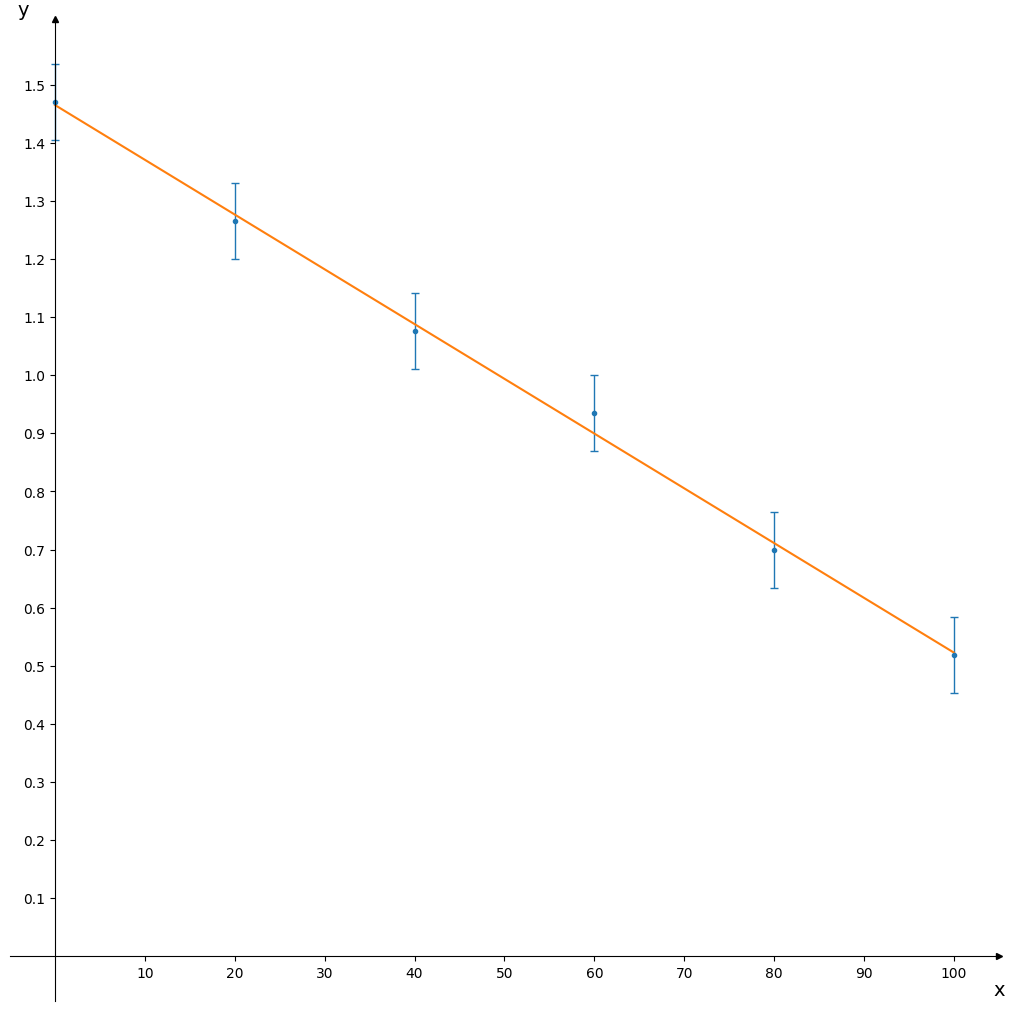

In [14]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

ax.errorbar(x_i, y_i, y_i_errors, fmt='.', linewidth=1, capsize=3)

x = np.array([0., 100.])
y = A + B*x

ax.plot(x, y, label='Теория')


# Рисуем оси
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Рисуем стрелочки
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create ' and 'y' labrfe$y=log_{{10}}s placed at the end of the axes
ax.set_xlabel(rf'x', size=14, labelpad=0, x=1.)
ax.set_ylabel('y', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 10., 0.1 
xmin, xmax, ymin, ymax = 0, 110, 0, 1.6
x_ticks = np.arange(xmin, xmax, x_frequency)
y_ticks = np.arange(ymin, ymax, y_frequency)
ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks[y_ticks**2 > 0.005])


# Отображаем
ax.set_title('')
# ax.legend()
ax.grid(False)